In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-failure-prediction/heart.csv


In [2]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot
import seaborn as sns

In [3]:
train = pd.read_csv("/kaggle/input/heart-failure-prediction/heart.csv")

### Create a copy of Dataset

In [4]:
train1 = train.copy()

In [5]:
train.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
train.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
913    False
914    False
915    False
916    False
917    False
Length: 918, dtype: bool

In [7]:
train.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [8]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [9]:
train.describe(include = 'object').T

,count,unique,top,freq
Sex,918,2,M,725
ChestPainType,918,4,ASY,496
RestingECG,918,3,Normal,552
ExerciseAngina,918,2,N,547
ST_Slope,918,3,Flat,460


#### EDA

## Univariate Data Analysis

<Axes: xlabel='Sex', ylabel='count'>

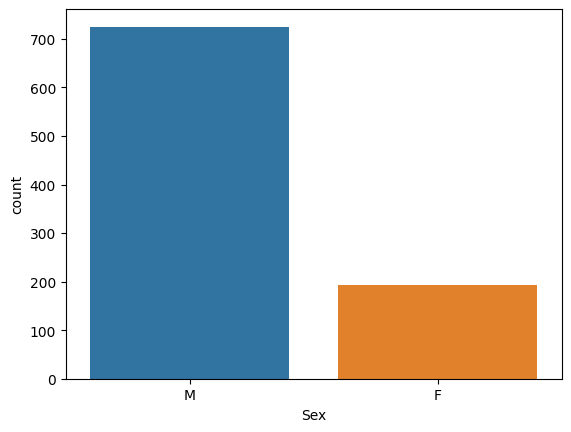

In [10]:
## plotting sex
sns.countplot (data = train, x = 'Sex')

<Axes: xlabel='ChestPainType', ylabel='count'>

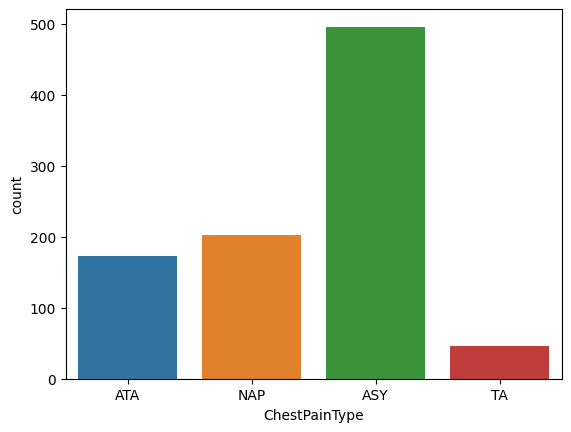

In [11]:
## plotting 
sns.countplot (data = train, x = 'ChestPainType')


<Axes: xlabel='ExerciseAngina', ylabel='count'>

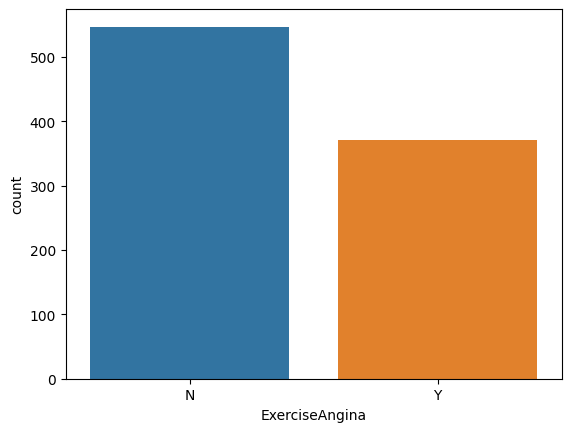

In [12]:
sns.countplot (data = train, x = 'ExerciseAngina')

<Axes: xlabel='RestingECG', ylabel='count'>

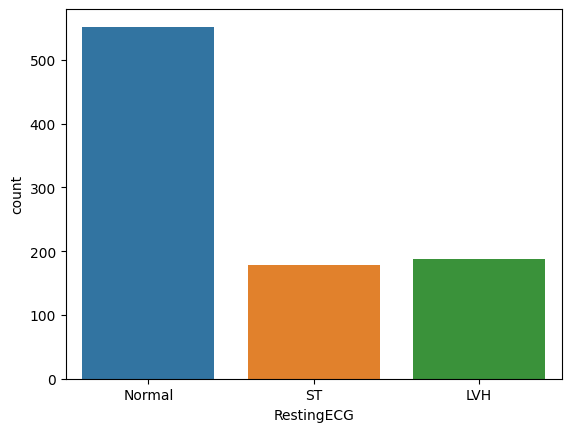

In [13]:
sns.countplot (data = train, x = 'RestingECG')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

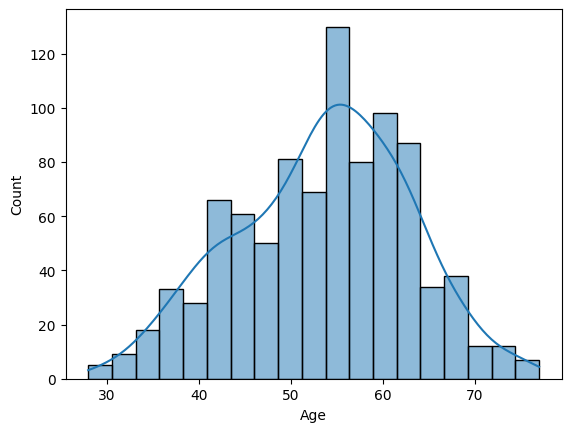

In [14]:
sns.histplot(data = train ,x = 'Age',kde = True)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Oldpeak', ylabel='Count'>

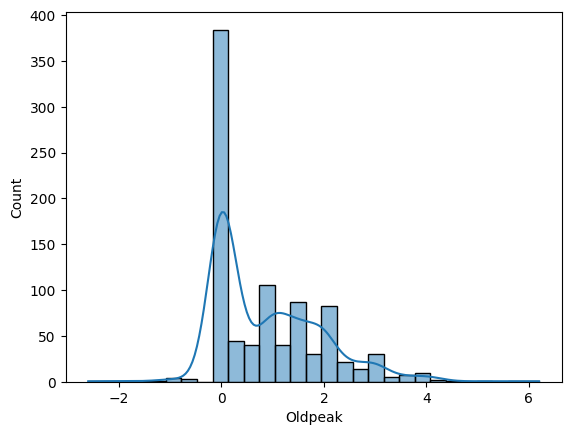

In [15]:
sns.histplot(data = train ,x = 'Oldpeak',kde = True)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='HeartDisease', ylabel='Count'>

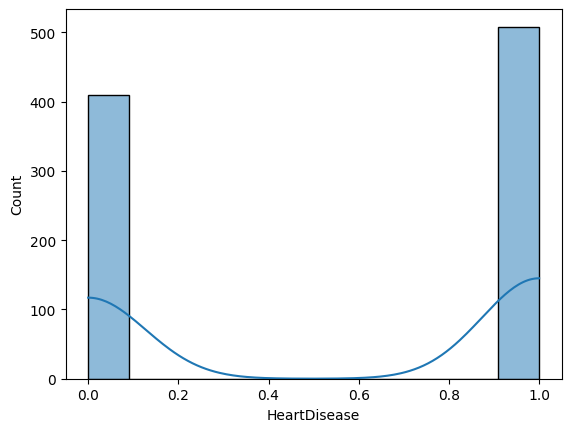

In [16]:
sns.histplot(data = train ,x = 'HeartDisease',kde = True)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='MaxHR', ylabel='Count'>

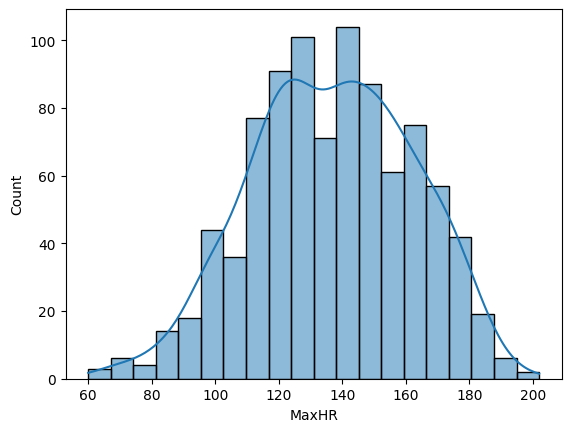

In [17]:
sns.histplot(data = train ,x = 'MaxHR',kde = True)

##### *BIVARIATE ANALYSIS*

<Axes: xlabel='Sex', ylabel='Age'>

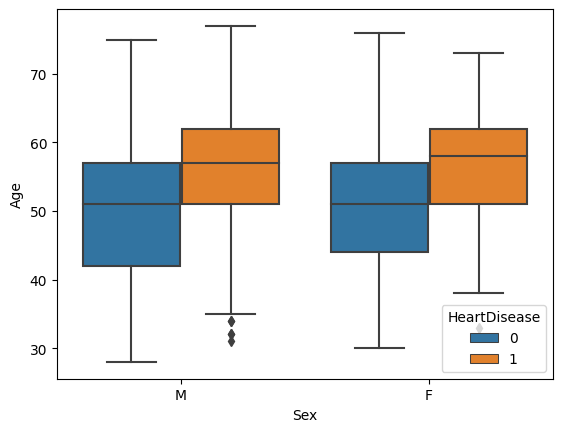

In [18]:
sns.boxplot(data = train, x = 'Sex' ,y = 'Age',hue = 'HeartDisease')

<Axes: xlabel='Sex', ylabel='Cholesterol'>

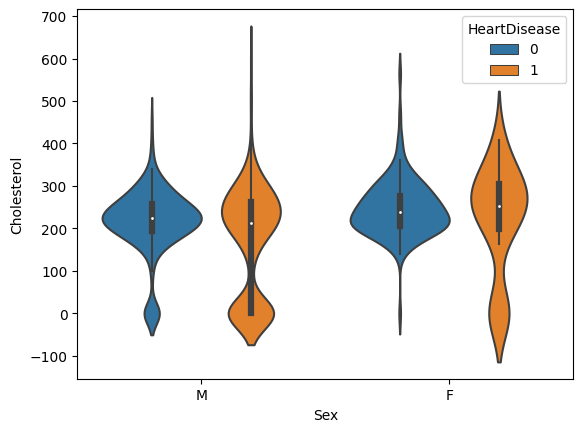

In [19]:
sns.violinplot(data = train, x = 'Sex' ,y = 'Cholesterol',hue = 'HeartDisease')

#### Feature engineering

In [20]:
train.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [21]:
#encoding features

le = LabelEncoder()
train['Sex'] = le.fit_transform(train['Sex'])
train.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,0,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,1,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [22]:
train['ExerciseAngina'] = le.fit_transform(train['ExerciseAngina'])
train.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,0,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,0,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,98,0,0.0,Up,0
3,48,0,ASY,138,214,0,Normal,108,1,1.5,Flat,1
4,54,1,NAP,150,195,0,Normal,122,0,0.0,Up,0


In [23]:
#one hot encoding
restingecg=pd.get_dummies(train['RestingECG'],prefix = 'RestingECG',drop_first = True).astype(int)
restingecg.head()

,RestingECG_Normal,RestingECG_ST
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [24]:
ST_Slope=pd.get_dummies(train['ST_Slope'],prefix = 'ST_Slope',drop_first = True).astype(int)
ST_Slope.head()

,ST_Slope_Flat,ST_Slope_Up
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1


In [25]:
ChestPainType=pd.get_dummies(train['ChestPainType'],prefix = 'ChestPainType',drop_first = True).astype(int)
ChestPainType.head()

,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,1,0,0
1,0,1,0
2,1,0,0
3,0,0,0
4,0,1,0


In [26]:
# train1 = pd.concat([train,])

In [27]:
train.drop(['RestingECG','ChestPainType','ST_Slope'],axis = 1,inplace = True)
train.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease
0,40,1,140,289,0,172,0,0.0,0
1,49,0,160,180,0,156,0,1.0,1
2,37,1,130,283,0,98,0,0.0,0
3,48,0,138,214,0,108,1,1.5,1
4,54,1,150,195,0,122,0,0.0,0


In [28]:
df11 = pd.concat([train,ChestPainType,ST_Slope,restingecg],axis=1)
df11.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ST_Slope_Flat,ST_Slope_Up,RestingECG_Normal,RestingECG_ST
0,40,1,140,289,0,172,0,0.0,0,1,0,0,0,1,1,0
1,49,0,160,180,0,156,0,1.0,1,0,1,0,1,0,1,0
2,37,1,130,283,0,98,0,0.0,0,1,0,0,0,1,0,1
3,48,0,138,214,0,108,1,1.5,1,0,0,0,1,0,1,0
4,54,1,150,195,0,122,0,0.0,0,0,1,0,0,1,1,0


In [29]:
X = df11.drop(['HeartDisease'],axis = 1)
y = df11['HeartDisease']
X.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ST_Slope_Flat,ST_Slope_Up,RestingECG_Normal,RestingECG_ST
0,40,1,140,289,0,172,0,0.0,1,0,0,0,1,1,0
1,49,0,160,180,0,156,0,1.0,0,1,0,1,0,1,0
2,37,1,130,283,0,98,0,0.0,1,0,0,0,1,0,1
3,48,0,138,214,0,108,1,1.5,0,0,0,1,0,1,0
4,54,1,150,195,0,122,0,0.0,0,1,0,0,1,1,0


In [30]:
##spliting the dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 42,stratify = y)

In [31]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train),columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test),columns = X_test.columns)

In [32]:
##initializing the Decision Tree

dtree = DecisionTreeClassifier(random_state = 42)

#fitting the model

dtree.fit(X_train_scaled,y_train)

DecisionTreeClassifier(random_state=42)

In [33]:
#predicting the dataset
y_pred = dtree.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1])

In [34]:
result = classification_report(y_test,y_pred)
print(result)


              precision    recall  f1-score   support

           0       0.53      0.93      0.67        82
           1       0.85      0.33      0.48       102

    accuracy                           0.60       184
   macro avg       0.69      0.63      0.58       184
weighted avg       0.71      0.60      0.57       184



In [35]:
y_pred = pd.DataFrame(y_pred,columns = ['y_pred'])
y_pred.head()

,y_pred
0,1
1,0
2,0
3,0
4,0
